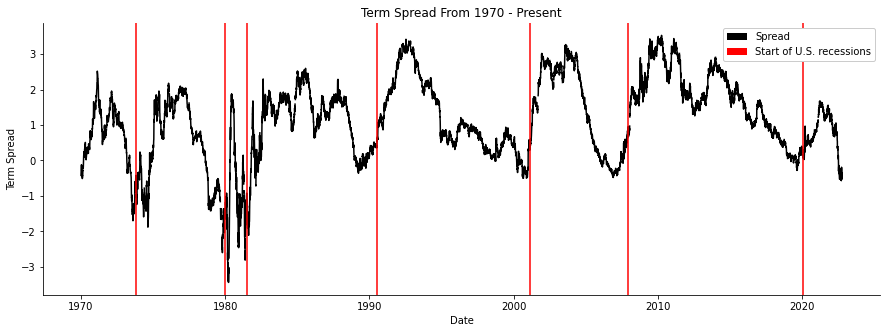

28   1973-11-01
29   1980-01-01
30   1981-07-01
31   1990-07-01
32   2001-03-01
33   2007-12-01
34   2020-02-01
Name: Peak month, dtype: datetime64[ns]


In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

from datetime import datetime
import pandas_datareader.data as web    

df = web.DataReader(['DGS10', 'DGS1'], 'fred', start = 1970) #importing the 1 year and 10 year data directly from FRED
df['spread'] = df['DGS10'] - df['DGS1']

business = pd.read_excel('bcdc_07192021_0-(1)-(3).xlsx', header = 2, na_values = 'NaN') #reading the business cycle file

business.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1, inplace = True) #dropped the first two columns because they are blank
business.rename(columns={'Unnamed: 2' : 'Peak month', 'Unnamed: 3' : 'Trough month'}, inplace= True) #renamming the important columns
business = business[:-7] #removing the last couple rows

business['Peak month'] = business['Peak month'].str[:-9] #cleaning the date data to be converted to datetime
business['Peak month'] = pd.to_datetime(business['Peak month'], format='%B %Y') #converting to datetime

business['Trough month'] = business['Trough month'].str[:-9] #cleaning the date data to be converted to datetime
business['Trough month'] = pd.to_datetime(business['Trough month'], format='%B %Y') #converting to datetime

business = business[business['Peak month'] >= datetime(1970,1,1)] #getting dates only from 1970 to present

fig, ax = plt.subplots(figsize=(15,5)) #creating the figure
ax.plot(df.index,df['spread'], color = 'black', label = 'Spread') #plotting the term spread
ax.set_title('Term Spread From 1970 - Present')

ax.spines['top'].set_visible(False) #removes the box lines on the top and right
ax.spines['right'].set_visible(False)

ax.set_xlabel('Date')
ax.set_ylabel('Term Spread')

for date in business['Peak month']: #loops over the business cycle dataset and creates vertical lines for the start of recessions
    plt.axvline(date, color = 'red')
#plt.axvline(pd.to_datetime('5-15-2022'), color = 'red')

start_of_recessions = mpatches.Patch(color='red', label='Start of U.S. recessions', linewidth = 0.01) #creating label for the legend
spread = mpatches.Patch(color = 'black', label = 'Spread', linewidth = 0.01) #creating label for the legend
ax.legend(loc = 'upper right', framealpha = 1,handles=[spread, start_of_recessions]) #creates legend
plt.show()
print(business['Peak month'])

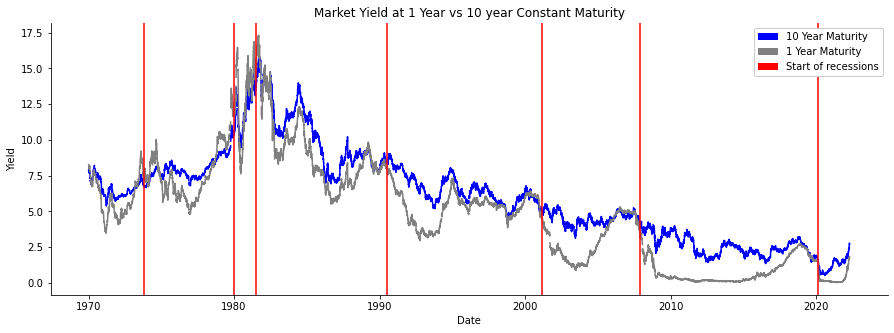

In [179]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['DGS10'], color = 'blue', label = '10 Year Maturity') #plotting the short/long term maturity rates
ax.plot(df['DGS1'], color = 'gray', label = '1 Year Maturity')
for date in business['Peak month']: #loops over the business cycle dataset and creates vertical lines for the start of recessions
    plt.axvline(date, color = 'red')

ax.set_title('Market Yield at 1 Year vs 10 year Constant Maturity') #labeling the axes
ax.set_ylabel('Yield')
ax.set_xlabel('Date')

Y10 = mpatches.Patch(color = 'blue', label = '10 Year Maturity', linewidth = 0.01) #creating label for the legend
Y1 = mpatches.Patch(color = 'gray', label = '1 Year Maturity', linewidth = 0.01)
recessions = mpatches.Patch(color = 'red', label = 'Start of recessions', linewidth = 0.01)
ax.legend(loc = 'upper right', framealpha = 1,handles=[Y10, Y1, recessions]) #creates legend

ax.spines['top'].set_visible(False) #removes the box lines on the top and right
ax.spines['right'].set_visible(False)

plt.show()

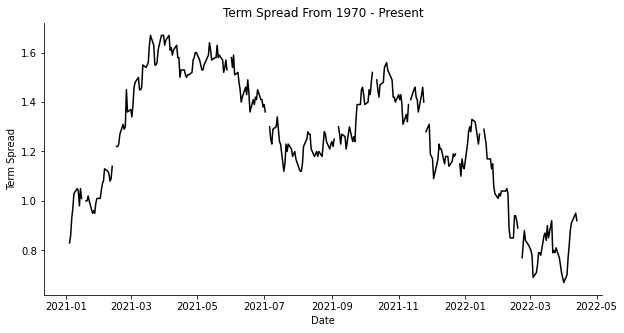

In [180]:
df = web.DataReader(['DGS10', 'DGS1'], 'fred', start = 2021) #getting the data directly from FRED over the past year
df['spread'] = df['DGS10'] - df['DGS1'] #calculating the term spread

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['spread'], color = 'black') #plotting the term spread
ax.set_title('Term Spread From 1970 - Present') #creating labels
ax.set_xlabel('Date')
ax.set_ylabel('Term Spread')

ax.spines['top'].set_visible(False) #removing lines on the top and right
ax.spines['right'].set_visible(False)

plt.show()